# EDA , Classification and regression on the dataset


> This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/benroshan/factors-affecting-campus-placement")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anshalsingh
Your Kaggle Key: ··········


100%|██████████| 4.51k/4.51k [00:00<00:00, 904kB/s]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
data=pd.read_csv("./factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [6]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [8]:
columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','etest_p','specialisation','status']

In [9]:
data.shape

(215, 15)

In [10]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
#salary has missing values for classification we will drop it for now
data=data.dropna(axis=1)

In [12]:
df=data.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
  df[i]=le.fit_transform(df[i])

In [14]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,9,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,74,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,55,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,37,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96,0,55.50,1


In [15]:
#dropping serial number
df=df.drop(columns=['sl_no'])

## EDA

sl_no
Serial Number

gender
Gender- Male='M',Female='F'

ssc_p
Secondary Education percentage- 10th Grade

ssc_b
Board of Education- Central/ Others

hsc_p
Higher Secondary Education percentage- 12th Grade

hsc_b
Board of Education- Central/ Others

hsc_s
Specialization in Higher Secondary Education

degree_p
Degree Percentage

degree_t
Under Graduation(Degree type)- Field of degree education

workex
Work Experience

etest_p
Employability test percentage ( conducted by college)

specialisation
Post Graduation(MBA)- Specialization

mba_p
MBA percentage

status
Status of placement- Placed/Not placed

salary
Salary offered by corporate to candidates

In [16]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

[]

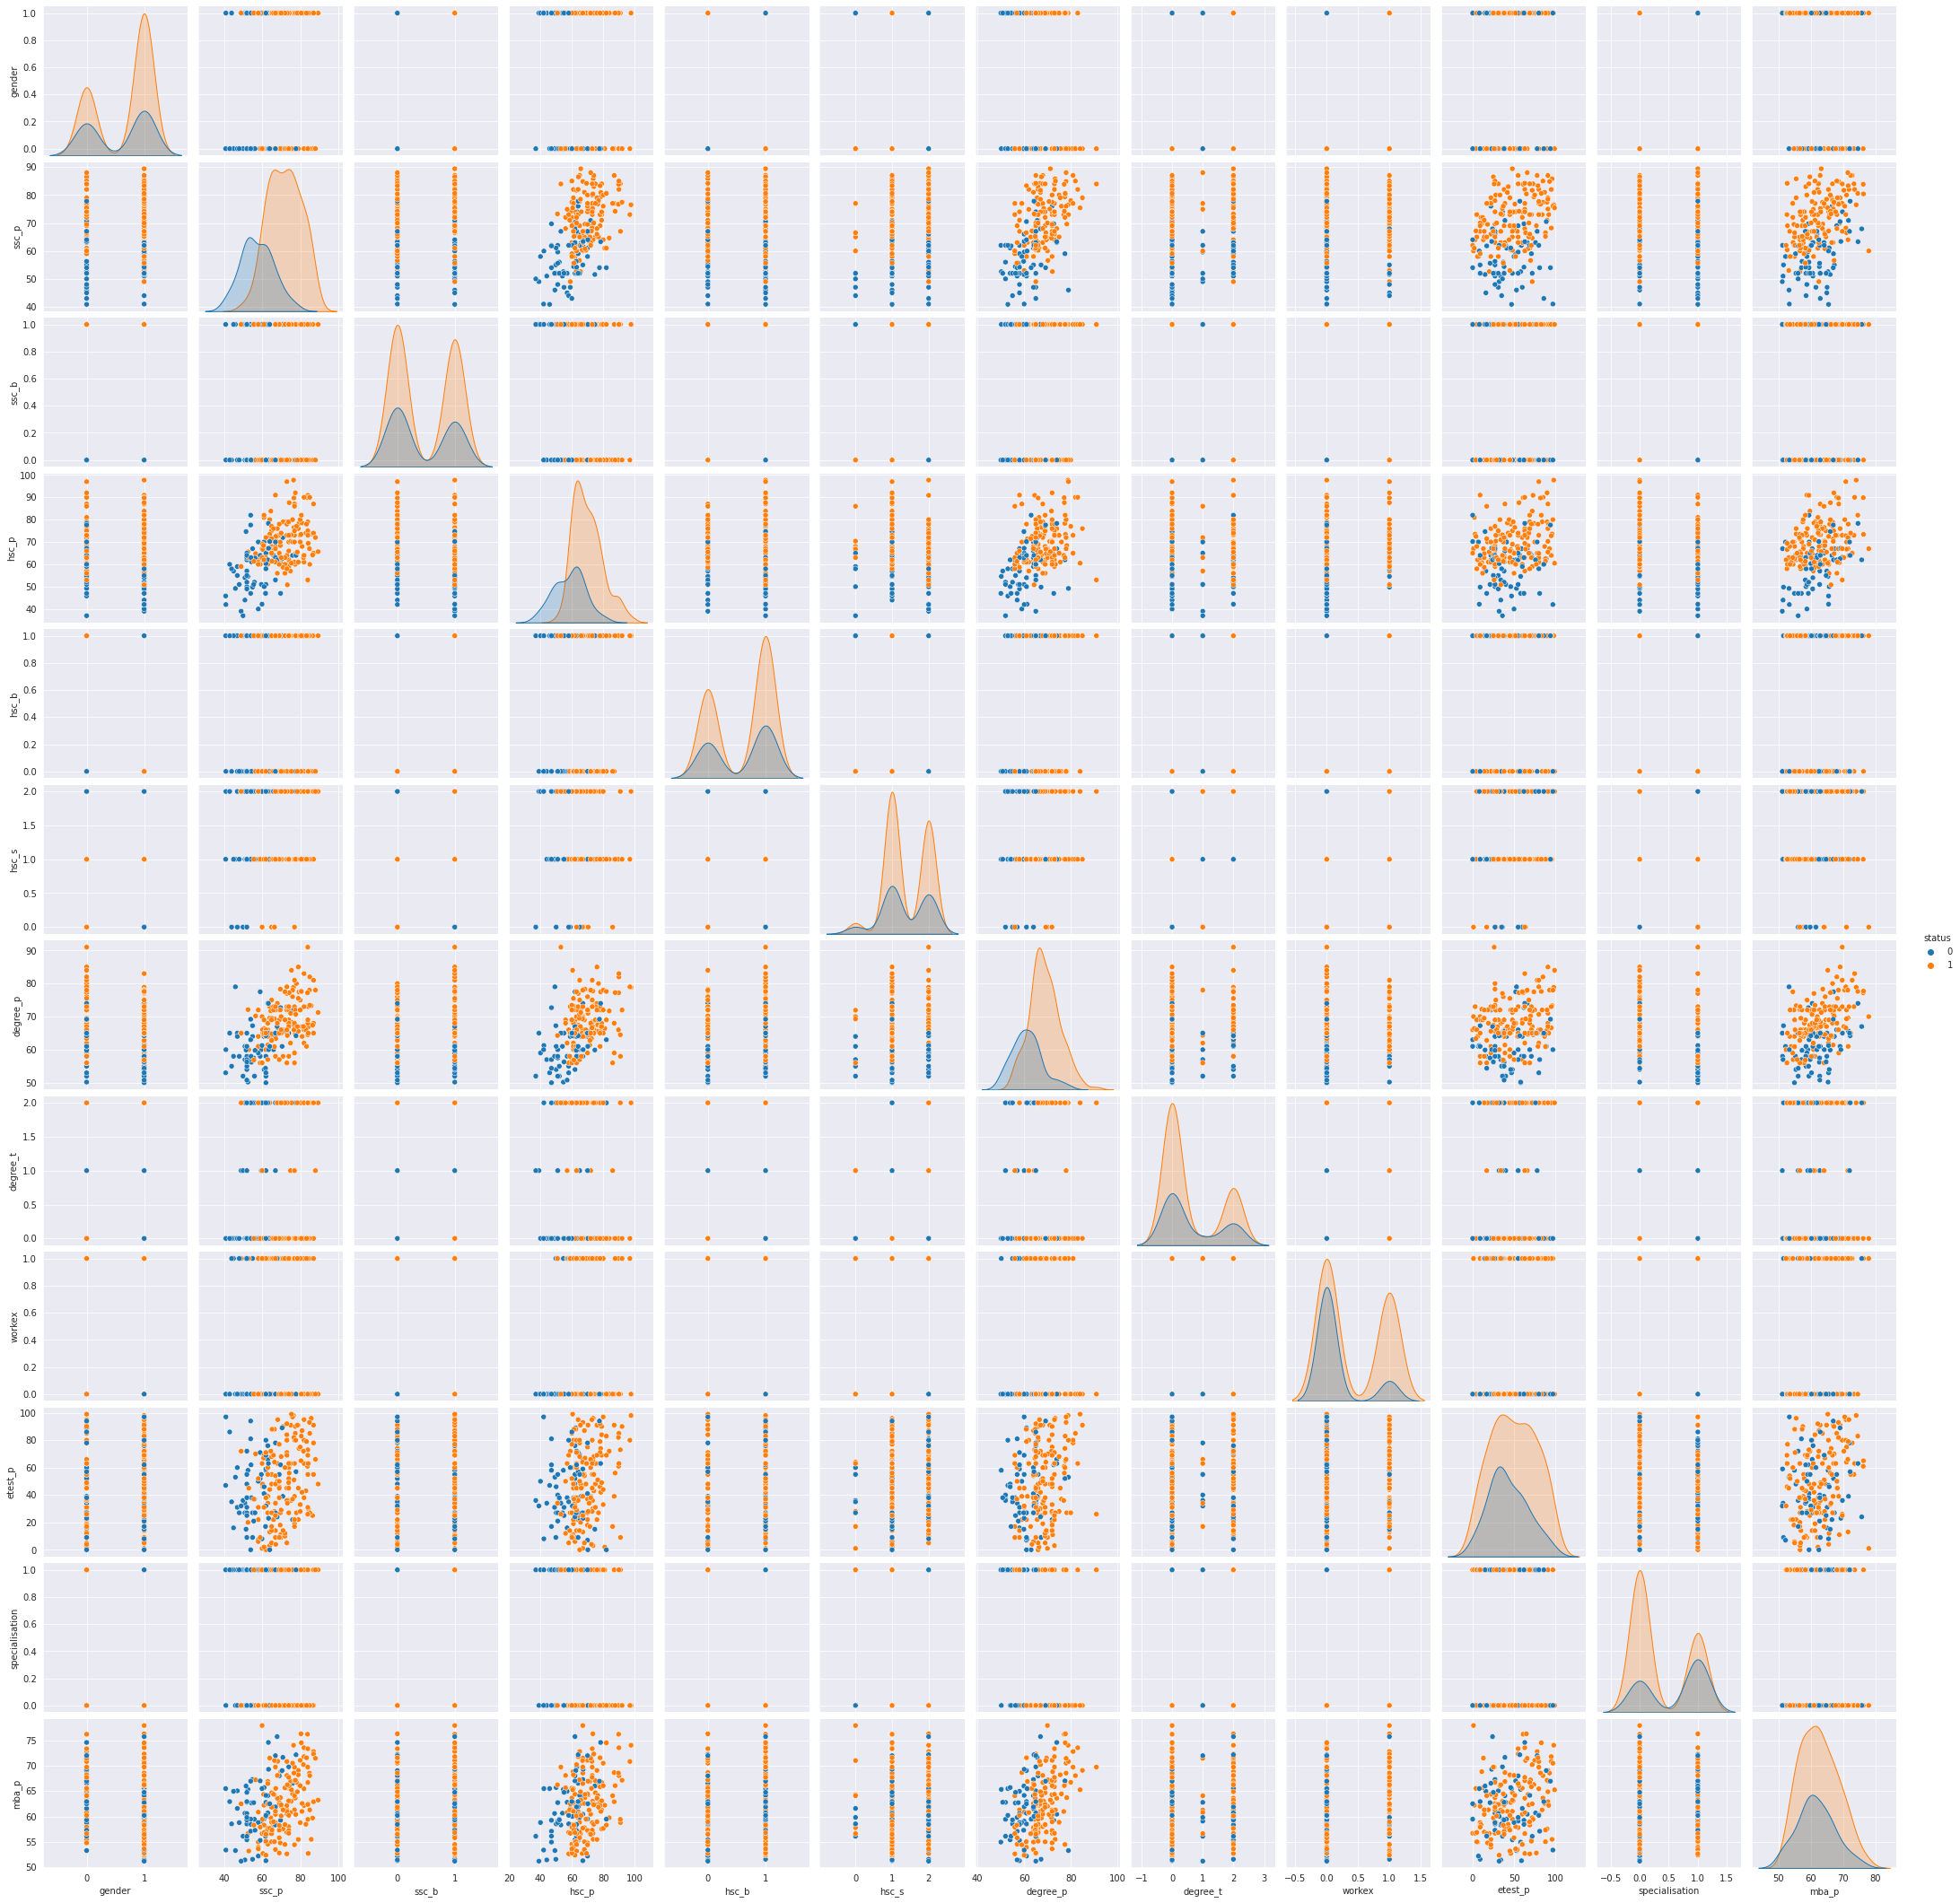

In [17]:
sns.pairplot(df,hue='status')
plt.plot()

- Gender

In [18]:
df.gender.nunique()

2

In [19]:
gen_count=data.gender.value_counts()
gen_count

M    139
F     76
Name: gender, dtype: int64

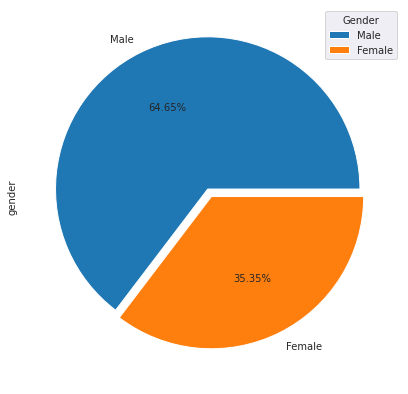

In [20]:
my_l=['Male','Female']
exp=[0.055,0]
gen_count.plot(kind='pie',figsize=(10,7),labels=my_l,autopct="%2.2f%%",explode=exp)
plt.legend(title="Gender",loc="upper right")
plt.show()

-SE Percentage

In [21]:
  data.ssc_p.nunique()

103

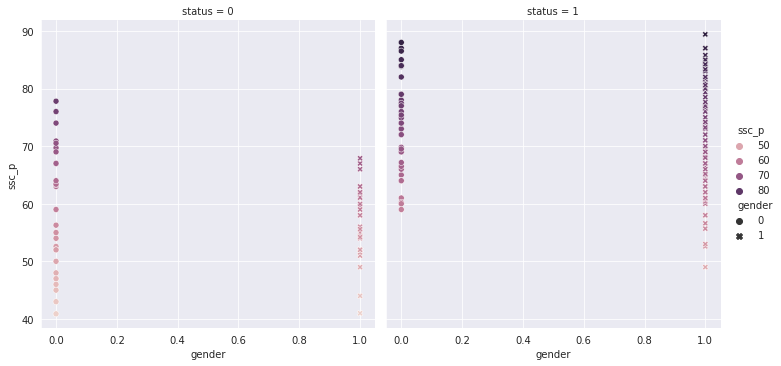

In [22]:
#male v female percentages v status
sns.relplot(data=df,x='gender',y='ssc_p',hue='ssc_p',style='gender',col='status')
plt.show()

- Board of Education SE

In [23]:
un_sscb=data.ssc_b.value_counts()

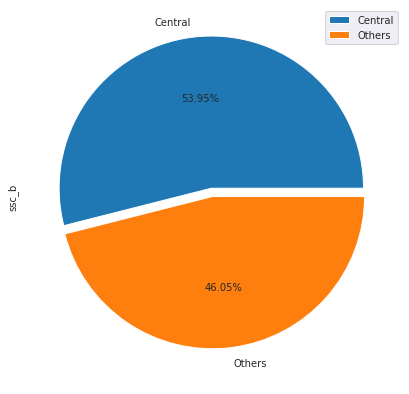

In [24]:
my_l=['Central','Others']
exp=[0.055,0]
un_sscb.plot(kind='pie',figsize=(10,7),labels=my_l,autopct="%2.2f%%",explode=exp)
plt.legend(loc="upper right")
plt.show()

- HSC percentages

In [25]:
un_hscp=df.hsc_p.value_counts()

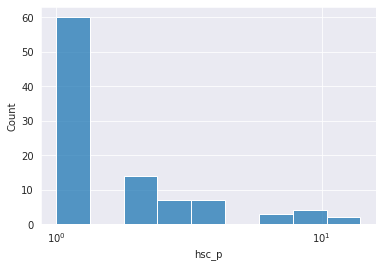

In [26]:
sns.histplot(un_hscp,log_scale=True)
plt.show()

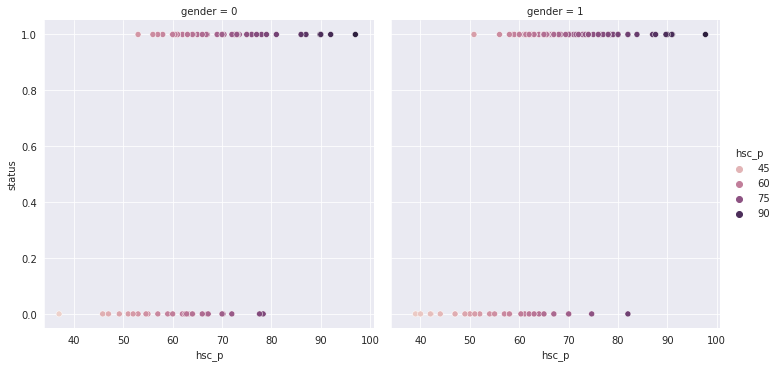

In [27]:
sns.relplot(data=df,x='hsc_p',y='status',hue='hsc_p',col='gender')
plt.show()

-Correlation

[]

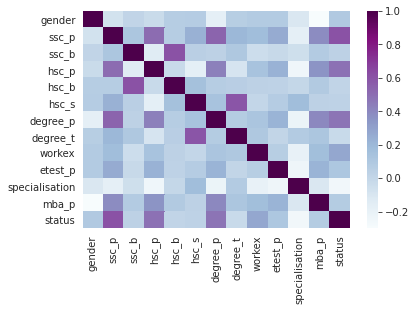

In [28]:
sns.heatmap(df.corr(),cmap='BuPu')
plt.plot()

## Data Preprocessing

In [29]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,9,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,74,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,55,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,37,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96,0,55.50,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int64  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int64  
 5   hsc_s           215 non-null    int64  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int64  
 8   workex          215 non-null    int64  
 9   etest_p         215 non-null    int64  
 10  specialisation  215 non-null    int64  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 22.0 KB


In [31]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,47.637209,0.441860,62.278186,0.688372
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,26.009677,0.497767,5.833385,0.464240
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,51.210000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,27.000000,0.000000,57.945000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,46.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,68.500000,1.000000,66.255000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,99.000000,1.000000,77.890000,1.000000


In [32]:
#defining data and target
target=data['status']
data_model=df.drop(columns=['status'])

In [33]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data_model=sc.fit_transform(data_model)

In [34]:
pd.DataFrame(data_model).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.739434,-0.028087,1.082459,2.268812,0.800763,-0.641955,-1.140102,1.576284,-0.724446,-1.488960,1.123903,-0.597647
1,0.739434,1.113369,-0.923823,1.103448,0.800763,1.083298,1.513267,1.576284,1.380364,1.015942,-0.889757,0.687620
2,0.739434,-0.213238,-0.923823,0.153313,-1.248809,-2.367207,-0.322843,-0.675550,-0.724446,0.283740,-0.889757,-0.769474
3,0.739434,-1.046417,-0.923823,-1.318339,-1.248809,1.083298,-1.957362,1.576284,-0.724446,-0.409926,1.123903,-0.489396
4,0.739434,1.712332,-0.923823,0.668391,-1.248809,-0.641955,0.943909,-0.675550,-0.724446,1.863755,-0.889757,-1.164676


In [35]:
#Splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_model,target,test_size=0.2)

## Classification

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
#training
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
lg.score(x_train,y_train)*100

90.11627906976744

In [39]:
#testing
lg.score(x_test,y_test)*100

88.37209302325581

In [99]:
pd.DataFrame(lg.predict(x_test)).to_csv("pred_class_test.csv")

In [40]:
print(classification_report(lg.predict(x_test),y_test))

              precision    recall  f1-score   support

  Not Placed       0.72      1.00      0.84        13
      Placed       1.00      0.83      0.91        30

    accuracy                           0.88        43
   macro avg       0.86      0.92      0.87        43
weighted avg       0.92      0.88      0.89        43



In [41]:
pd.crosstab(y_test,lg.predict(x_test))

col_0,Not Placed,Placed
status,,
Not Placed,13,5
Placed,0,25


In [42]:
confusion_matrix(y_test,lg.predict(x_test))

array([[13,  5],
       [ 0, 25]])

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,criterion='entropy',random_state=50)

In [44]:
#train
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [45]:
print(accuracy_score(dt.predict(x_train),y_train)*100)

88.95348837209302


In [46]:
#test
dt.score(x_test,y_test)*100

79.06976744186046

In [47]:
print(classification_report(dt.predict(x_test),y_test))

              precision    recall  f1-score   support

  Not Placed       0.50      1.00      0.67         9
      Placed       1.00      0.74      0.85        34

    accuracy                           0.79        43
   macro avg       0.75      0.87      0.76        43
weighted avg       0.90      0.79      0.81        43



In [48]:
pd.crosstab(y_test,dt.predict(x_test))

col_0,Not Placed,Placed
status,,
Not Placed,9,9
Placed,0,25


In [49]:
#plotting the tree
import graphviz
from sklearn import tree

In [50]:
x=df.drop(columns=['status'])
y=pd.DataFrame(target)

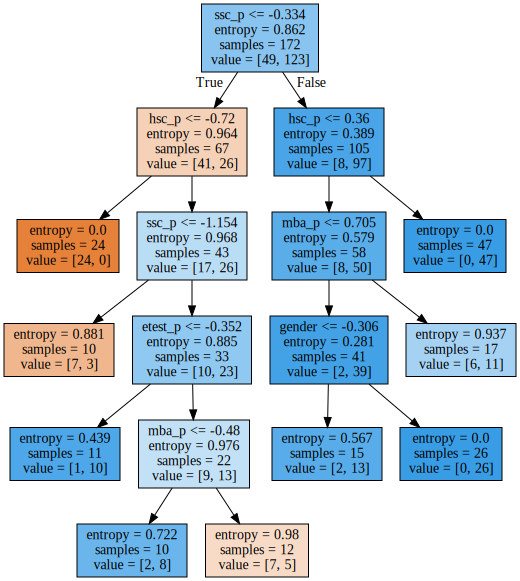

In [51]:
dot_data=tree.export_graphviz(dt,feature_names=x.columns,filled=True)
graph=graphviz.Source(dot_data)
graph

In [52]:
text_data=tree.export_text(dt)
print(text_data)

|--- feature_1 <= -0.33
|   |--- feature_3 <= -0.72
|   |   |--- class: Not Placed
|   |--- feature_3 >  -0.72
|   |   |--- feature_1 <= -1.15
|   |   |   |--- class: Not Placed
|   |   |--- feature_1 >  -1.15
|   |   |   |--- feature_9 <= -0.35
|   |   |   |   |--- class: Placed
|   |   |   |--- feature_9 >  -0.35
|   |   |   |   |--- feature_11 <= -0.48
|   |   |   |   |   |--- class: Placed
|   |   |   |   |--- feature_11 >  -0.48
|   |   |   |   |   |--- class: Not Placed
|--- feature_1 >  -0.33
|   |--- feature_3 <= 0.36
|   |   |--- feature_11 <= 0.70
|   |   |   |--- feature_0 <= -0.31
|   |   |   |   |--- class: Placed
|   |   |   |--- feature_0 >  -0.31
|   |   |   |   |--- class: Placed
|   |   |--- feature_11 >  0.70
|   |   |   |--- class: Placed
|   |--- feature_3 >  0.36
|   |   |--- class: Placed



## Regression

In [55]:
data_reg=data=pd.read_csv("./factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [56]:
data_reg.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [57]:
data_reg=data_reg.drop(columns=['sl_no'])

In [58]:
columns

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'status']

In [59]:
for i in columns:
  data_reg[i]=le.fit_transform(data_reg[i])

In [60]:
data_reg.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,9,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,74,0,66.28,1,200000.0


In [61]:
data_reg.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [62]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

In [63]:
data_reg=si.fit_transform(data_reg)

In [65]:
pd.DataFrame(data_reg).isnull().sum().sum()

0

In [71]:
data_reg=pd.DataFrame(data_reg)
data_reg.head

<bound method NDFrame.head of       0      1    2      3    4    5   ...   8     9    10     11   12        13
0    1.0  67.00  1.0  91.00  1.0  1.0  ...  0.0   9.0  1.0  58.80  1.0  270000.0
1    1.0  79.33  0.0  78.33  1.0  2.0  ...  1.0  74.0  0.0  66.28  1.0  200000.0
2    1.0  65.00  0.0  68.00  0.0  0.0  ...  0.0  55.0  0.0  57.80  1.0  250000.0
3    1.0  56.00  0.0  52.00  0.0  2.0  ...  0.0  37.0  1.0  59.43  0.0  300000.0
4    1.0  85.80  0.0  73.60  0.0  1.0  ...  0.0  96.0  0.0  55.50  1.0  425000.0
..   ...    ...  ...    ...  ...  ...  ...  ...   ...  ...    ...  ...       ...
210  1.0  80.60  1.0  82.00  1.0  1.0  ...  0.0  83.0  0.0  74.49  1.0  400000.0
211  1.0  58.00  1.0  60.00  1.0  2.0  ...  0.0  52.0  0.0  53.62  1.0  275000.0
212  1.0  67.00  1.0  67.00  1.0  1.0  ...  1.0  25.0  0.0  69.72  1.0  295000.0
213  0.0  74.00  1.0  66.00  1.0  1.0  ...  0.0  45.0  1.0  60.23  1.0  204000.0
214  1.0  62.00  0.0  58.00  1.0  2.0  ...  0.0  80.0  1.0  60.22  0.0  300000.

In [69]:
tar_reg=data_reg[13]
tar_reg

0      270000.0
1      200000.0
2      250000.0
3      300000.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214    300000.0
Name: 13, Length: 215, dtype: float64

In [70]:
dat_reg=data_reg.drop(columns=[13])
dat_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,9.0,1.0,58.80,1.0
1,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,74.0,0.0,66.28,1.0
2,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,55.0,0.0,57.80,1.0
3,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,37.0,1.0,59.43,0.0
4,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.0,0.0,55.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,83.0,0.0,74.49,1.0
211,1.0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,52.0,0.0,53.62,1.0
212,1.0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,25.0,0.0,69.72,1.0
213,0.0,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,45.0,1.0,60.23,1.0


In [72]:
dat_reg.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,47.637209,0.441860,62.278186,0.688372
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,26.009677,0.497767,5.833385,0.464240
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,51.210000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,27.000000,0.000000,57.945000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,46.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,68.500000,1.000000,66.255000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,99.000000,1.000000,77.890000,1.000000


In [74]:
dat_reg=sc.fit_transform(dat_reg)
pd.DataFrame(dat_reg).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02
mean,1.652425e-16,1.368414e-17,-3.511403e-17,-5.163828e-18,1.611114e-16,-6.506423e-17,-3.201573e-17,-2.788467e-17,-2.478637e-17,2.065531e-17,-6.196594e-17,4.389254e-18,-5.163828e-18
std,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00
min,-1.352386e+00,-2.445233e+00,-9.238226e-01,-2.698013e+00,-1.248809e+00,-2.367207e+00,-2.229781e+00,-6.755501e-01,-7.244465e-01,-1.835793e+00,-8.897565e-01,-1.901815e+00,-1.486255e+00
25%,-1.352386e+00,-6.205700e-01,-9.238226e-01,-4.997328e-01,-1.248809e+00,-6.419545e-01,-7.314725e-01,-6.755501e-01,-7.244465e-01,-7.952952e-01,-8.897565e-01,-7.445589e-01,-1.486255e+00
50%,7.394340e-01,-2.808697e-02,-9.238226e-01,-1.226220e-01,8.007630e-01,-6.419545e-01,-5.042301e-02,-6.755501e-01,-7.244465e-01,-6.309306e-02,-8.897565e-01,-4.779991e-02,6.728319e-01
75%,7.394340e-01,7.773197e-01,1.082459e+00,6.132040e-01,8.007630e-01,1.083298e+00,7.668364e-01,1.576284e+00,1.380364e+00,8.039884e-01,1.123903e+00,6.833245e-01,6.728319e-01
max,7.394340e-01,2.045604e+00,1.082459e+00,2.885067e+00,8.007630e-01,1.083298e+00,3.354825e+00,1.576284e+00,1.380364e+00,1.979366e+00,1.123903e+00,2.682533e+00,6.728319e-01


In [75]:
x_tr_reg,x_te_reg,y_tr_reg,y_te_reg=train_test_split(dat_reg,tar_reg,test_size=0.3)

### Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [77]:
#train
linreg.fit(x_tr_reg,y_tr_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
#scores
print(r2_score(linreg.predict(x_tr_reg),y_tr_reg))
print(mean_squared_error(linreg.predict(x_tr_reg),y_tr_reg))
print(mean_absolute_error(linreg.predict(x_tr_reg),y_tr_reg))

-5.6132556768227
5639361739.55179
42145.33914181733


In [79]:
#test
print(r2_score(linreg.predict(x_te_reg),y_te_reg))
print(mean_squared_error(linreg.predict(x_te_reg),y_te_reg))
print(mean_absolute_error(linreg.predict(x_te_reg),y_te_reg))

-4.704739141709911
4997625396.450809
43722.206037602344


###POlynomial Regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures
pl=PolynomialFeatures()

In [81]:
pl_tr=pl.fit_transform(x_tr_reg)
pl_te=pl.fit_transform(x_te_reg)

In [82]:
#train
poly=LinearRegression()

In [83]:
poly.fit(pl_tr,y_tr_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#scores
print(r2_score(poly.predict(pl_tr),y_tr_reg))
print(mean_squared_error(poly.predict(pl_tr),y_tr_reg))
print(mean_absolute_error(poly.predict(pl_tr),y_tr_reg))

-0.024399766064588713
3285698981.12
32384.8


In [85]:
#test
print(r2_score(poly.predict(pl_te),y_te_reg))
print(mean_squared_error(poly.predict(pl_te),y_te_reg))
print(mean_absolute_error(poly.predict(pl_te),y_te_reg))

-0.4954906478250125
12850070171.569231
84676.43076923076


In [87]:
poly.predict(pl_te)

array([174208.,  65312., 248288., 356720., 375824., 371504., 418448.,
       236480., 385648., 222896., 285440., 376272., 224656., 226208.,
       115088., 183760., 231376., 219744., 218320., 258448., 300992.,
       275232., 280736., 166304., 222688., 197520., 228752., 225872.,
       309232., 333792., 431248., 144528., 326160., 330448., 243536.,
       309344., 194512., 342624., 249504., 350576., 320400., 208624.,
       184656., 328784., 316480., 160544., 121072., 257632.,  93136.,
       176848., 262160., 118928., 162448., 458272., 204848., 315728.,
       187536., 278928., 518768., 486928., 207568., 289040., 266640.,
       287056., 289392.])

### Decision Tree regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(max_depth=10,min_samples_leaf=15,random_state=50)

In [92]:
#train
dt_reg.fit(x_tr_reg,y_tr_reg)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=50, splitter='best')

In [93]:
#scores
print(r2_score(dt_reg.predict(x_tr_reg),y_tr_reg))
print(mean_squared_error(dt_reg.predict(x_tr_reg),y_tr_reg))
print(mean_absolute_error(dt_reg.predict(x_tr_reg),y_tr_reg))

-2.0517474869396475
4889802061.405741
39500.463708290335


In [94]:
#testing
print(r2_score(dt_reg.predict(x_te_reg),y_te_reg))
print(mean_squared_error(dt_reg.predict(x_te_reg),y_te_reg))
print(mean_absolute_error(dt_reg.predict(x_te_reg),y_te_reg))

-2.1608636087815793
5401708968.576799
50617.35145143814


In [97]:
pd.DataFrame(dt_reg.predict(x_te_reg)).describe()

,0
count,65.000000
mean,286310.294545
std,41660.972540
min,240285.714286
25%,268909.090909
50%,271150.000000
75%,303157.894737
max,388294.117647


In [96]:
tar_reg.describe()

count       215.000000
mean     292190.697674
std       77636.740429
min      200000.000000
25%      250000.000000
50%      300000.000000
75%      300000.000000
max      940000.000000
Name: 13, dtype: float64

In [98]:
pd.DataFrame(dt_reg.predict(x_te_reg)).to_csv("pred_reg_test.csv")